<a href="https://colab.research.google.com/github/Mchoon84/AIFFEL_guest_cr/blob/main/Exploration/Ex06/Ex06_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트: ControlNet으로 조건을 준 이미지 생성하기

### ControlNet이란?
- 생성된 이미지를 원하는 대로 출력
- 추가 조건을 추가하여 출력되는 이미지를 쉽게 제어
- 훈련 데이터가 작아도 학습이 잘 되고 빠름

전처리기 종류
- 외곽선 감지(Canny Edge detection)
- 인체 자세 감지(Human pose)
- 낙서 지도(Scribble map)
- 시맨틱 세그멘테이션(Semantic segmentation)

In [ ]:
# !pip install -qq diffusers==0.31

In [ ]:
# 메모리 삭제
# torch.cuda.empty_cache()

### Canny 윤곽선 검출

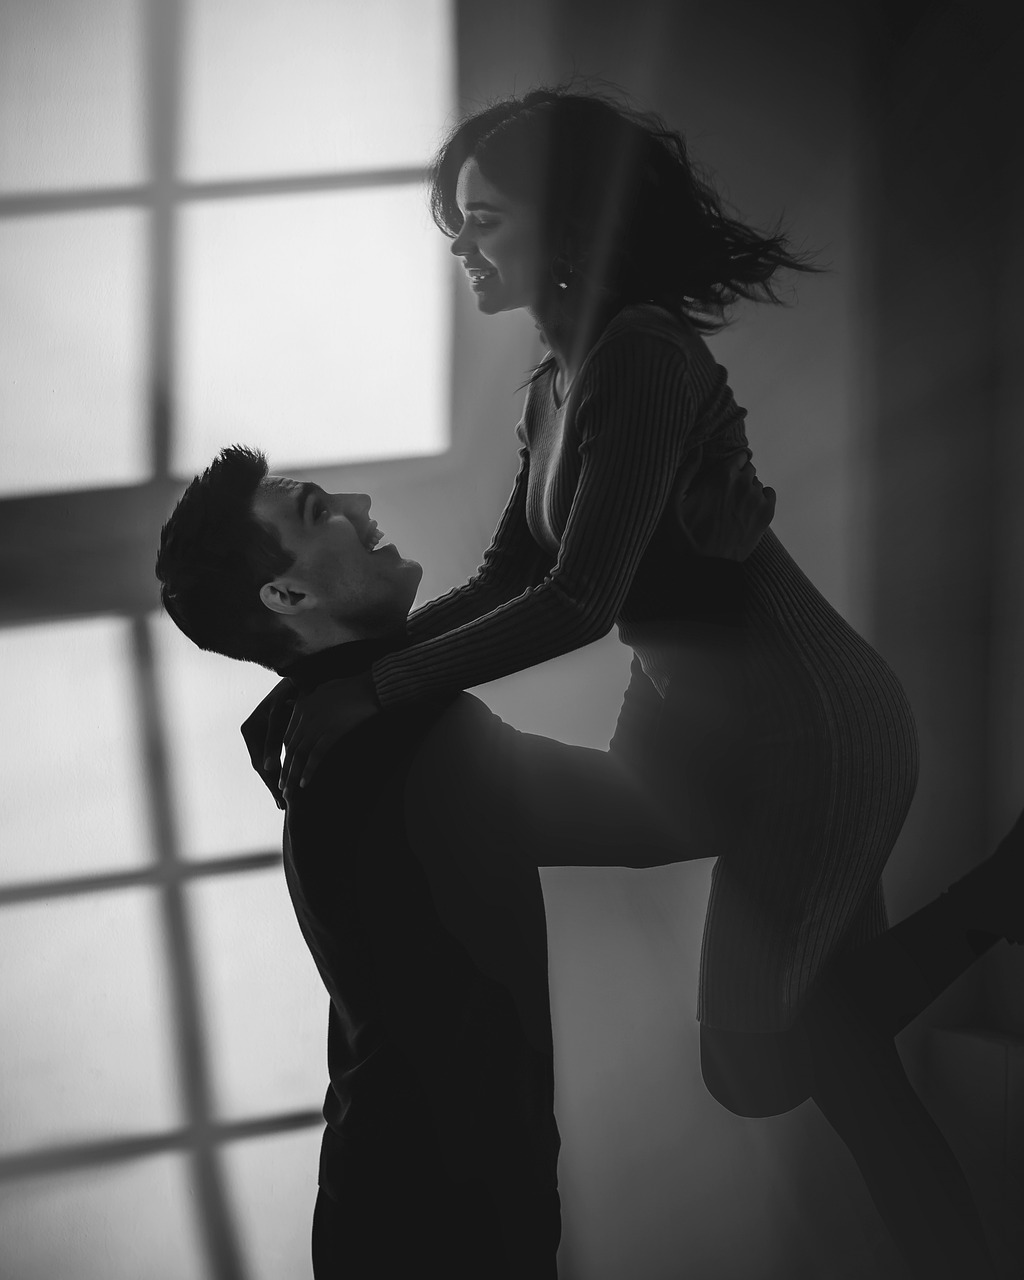

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

# 이미지 불러오기
image = load_image(
    "https://cdn.pixabay.com/photo/2019/07/08/19/36/couple-4325416_1280.jpg"
)

image

### OpenCV

이미지의 윤곽선을 검출

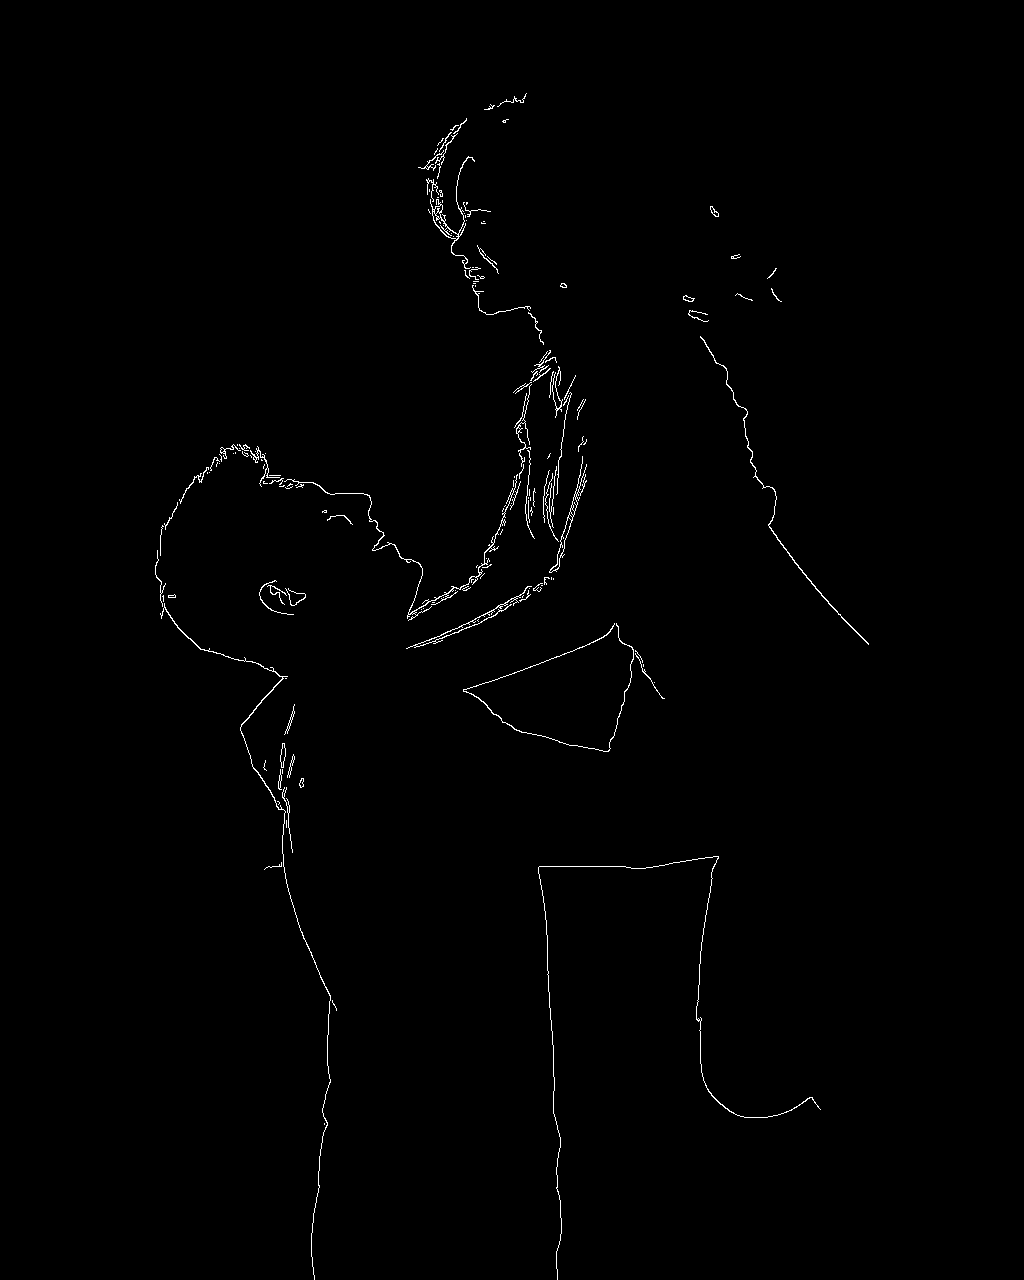

In [ ]:
import cv2
from PIL import Image
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image = np.array(image)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.

canny_image

윤곽선 검출 전처리기를 사용한 모델 파이프라인 불러오기

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

윤곽선을 추출한 이미지에 프롬프트를 적용하여 새로운 이미지를 생성

  0%|          | 0/20 [00:00<?, ?it/s]

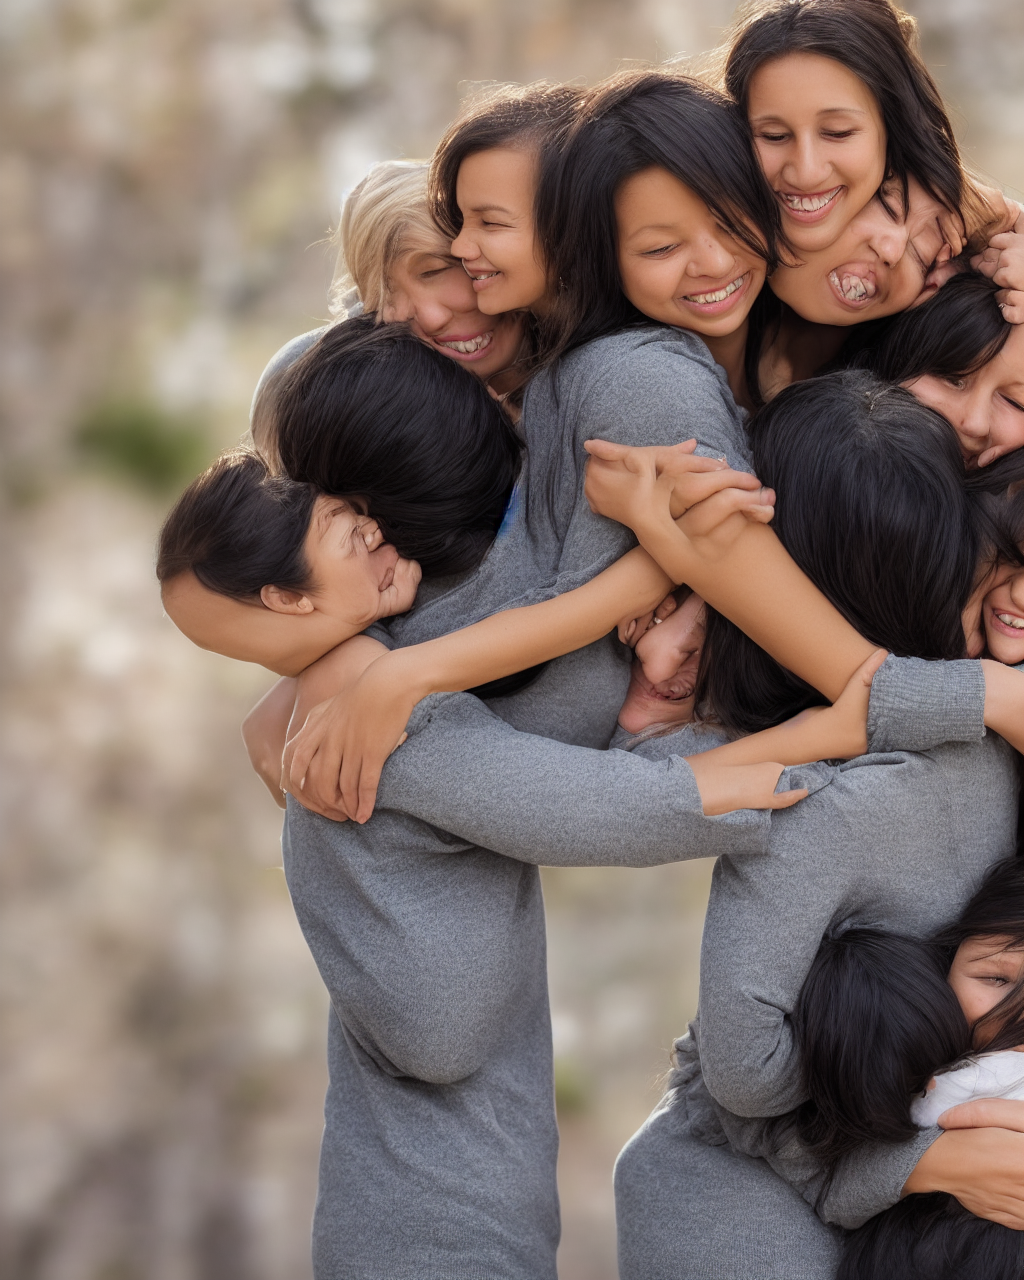

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="hugging with mom and daughter",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 출력합니다.
canny_image

✅ 너무 무서운 사진, 아직 두 사람의 윤곽선은 힘든다보다.

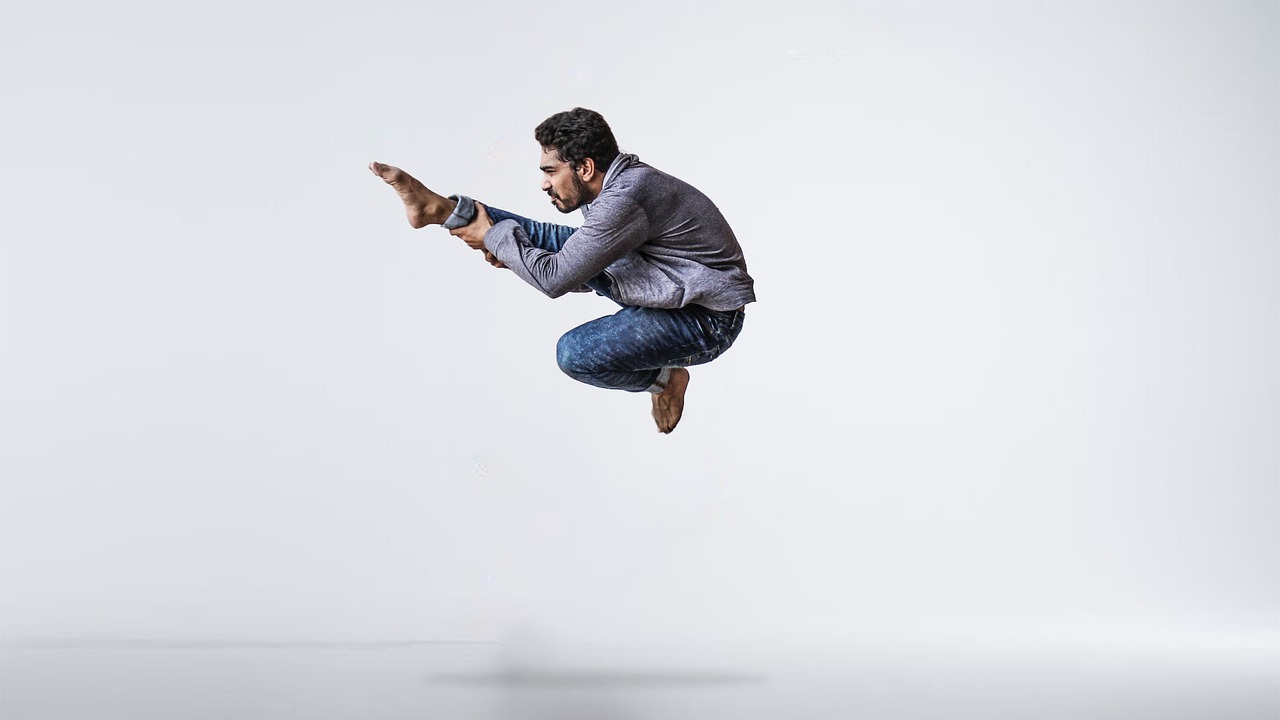

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

# 이미지 불러오기
image = load_image(
    "https://cdn.pixabay.com/photo/2020/10/07/15/20/man-5635507_1280.jpg"
)

image

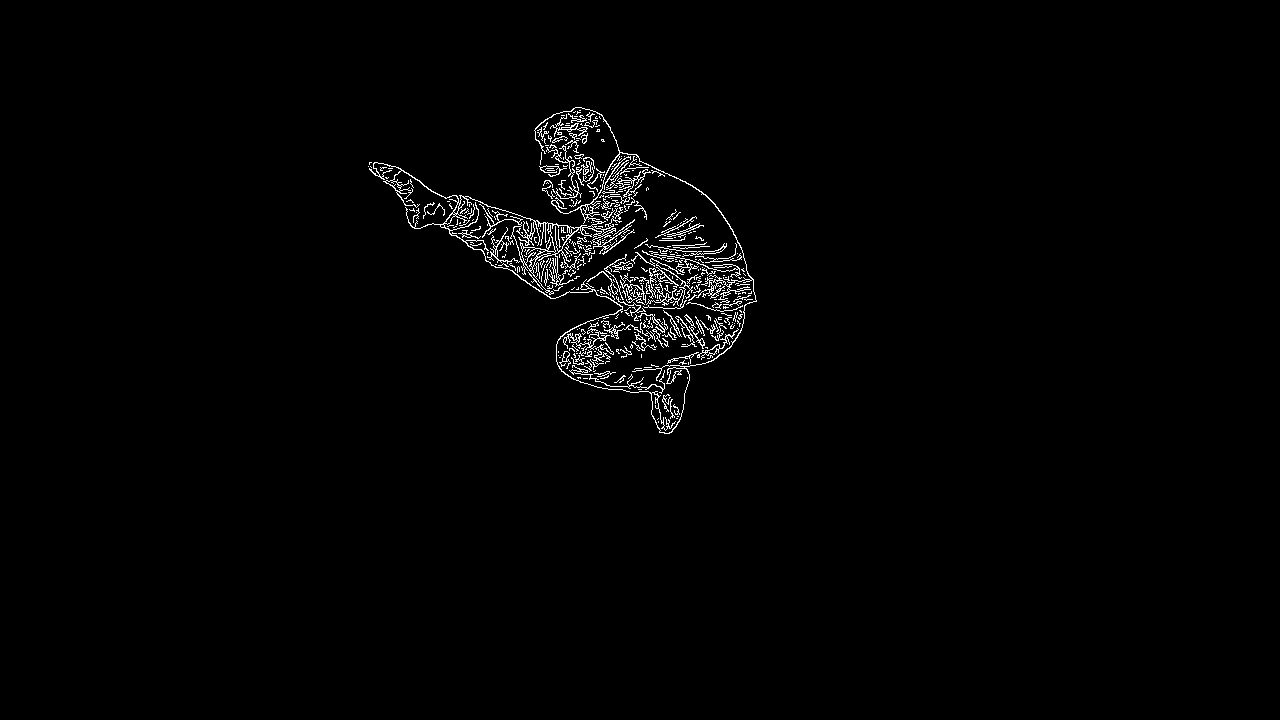

In [ ]:
import cv2
from PIL import Image
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
image = np.array(image)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.

canny_image

  0%|          | 0/20 [00:00<?, ?it/s]

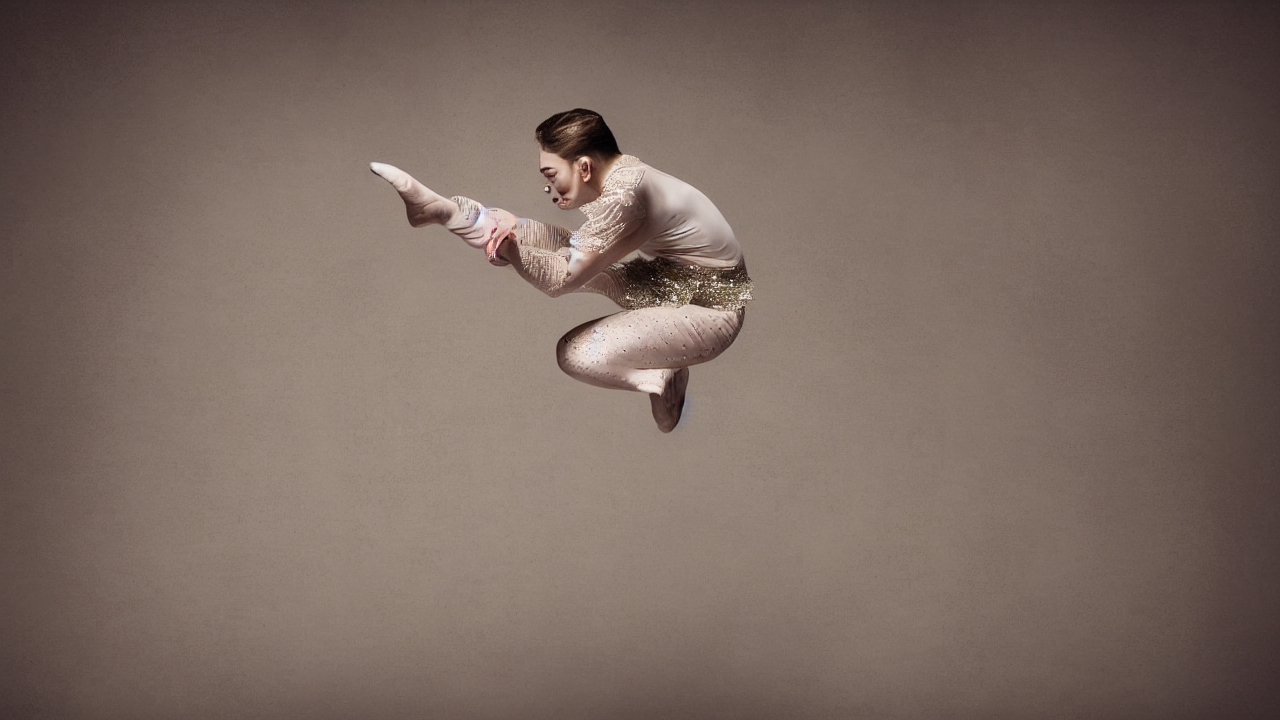

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="A graceful ballerina captured mid-jump Her expression exudes focus and elegance",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 출력합니다.
canny_image

✅ 아놔~~ 거 너무한거 아니오!!!

### 인체 자세 감지

Openpose
- 인체 자세 감지(Human pose)를 할 수 있는 전처리기
- 자세를 감지하여 새로운 이미지를 생성

In [ ]:
!pip install controlnet-aux==0.0.1

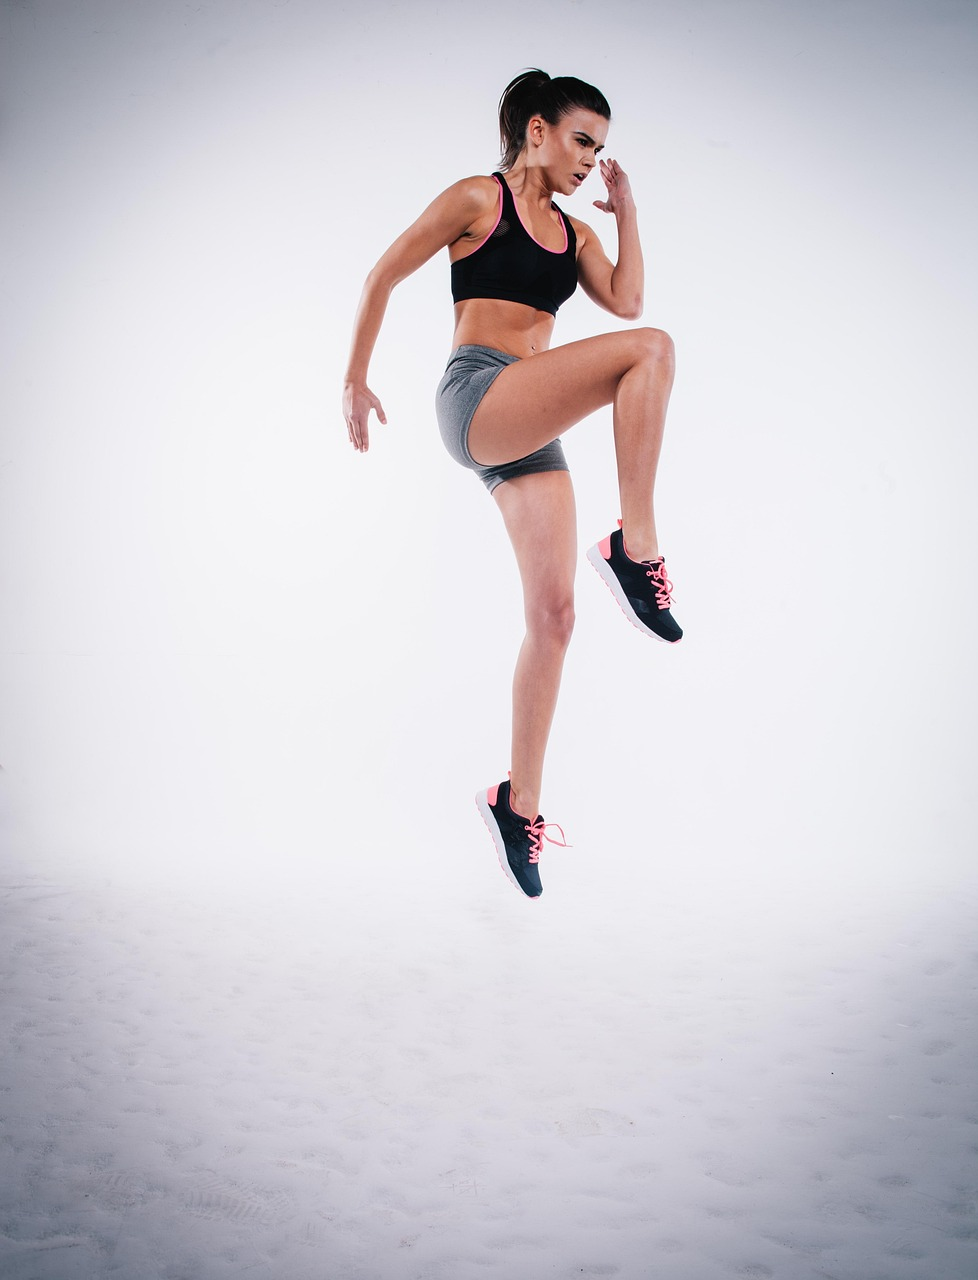

In [ ]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://cdn.pixabay.com/photo/2016/11/22/21/38/action-1850677_1280.jpg"
)
openpose_image


Openpose 검출기를 사용하여 자세 추출

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

cuda


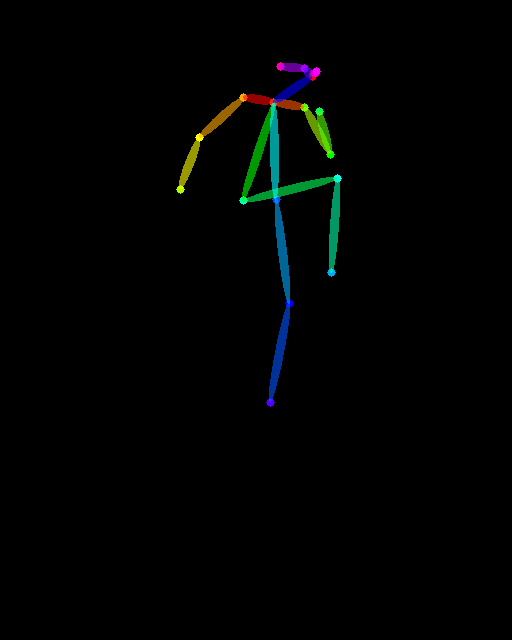

In [ ]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

Openpose 전처리기를 사용한 모델 파이프라인을 불러오기

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

이미지 생성

  0%|          | 0/40 [00:00<?, ?it/s]

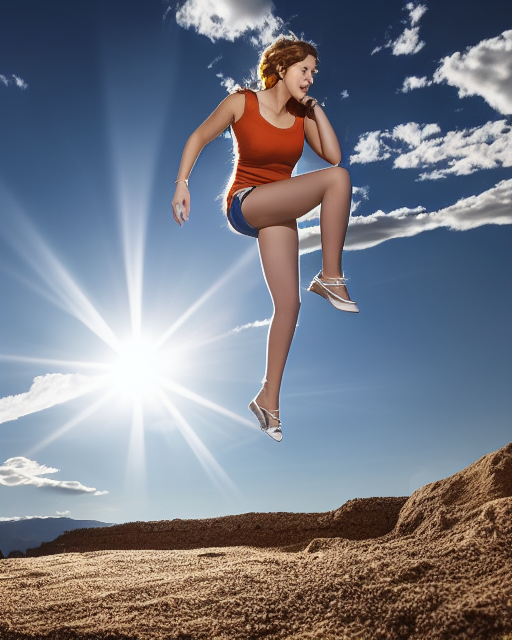

In [ ]:
from diffusers import UniPCMultistepScheduler
import torch

# 스케줄러 교체 & 모델을 CUDA로 이동
openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# ✅ 동일한 이미지를 생성하기 위해 seed를 고정
generator = torch.manual_seed(0)

# ✅ 프롬프트 설정
prompt = "woman, jump, sunlight, 4k"
negative_prompt = "low quality, blurry, distorted, deformed"

# ✅ 이미지 생성
openpose_image1 = openpose_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    controlnet_conditioning_scale=2.0,   # 보통 0.5 ~ 2.0 사이에서 조정
    num_inference_steps=40,
    generator=generator,
    image=openpose_image                # ← OpenPose 조건 이미지 입력
).images[0]

# ✅ 이미지 출력
openpose_image1